# PCA Demo

<hr>

In [138]:
import numpy as np
from numpy import cov
from numpy.linalg import eig

In [139]:
A = np.random.rand(10, 5)
A

array([[0.47187007, 0.78851027, 0.78959118, 0.92471391, 0.75879737],
       [0.82798313, 0.63212273, 0.45014952, 0.0866226 , 0.90903321],
       [0.66253658, 0.60322523, 0.62440946, 0.32879956, 0.26143514],
       [0.00504443, 0.04372439, 0.16220897, 0.27832789, 0.41062473],
       [0.72274482, 0.59477935, 0.31838416, 0.8830858 , 0.39654985],
       [0.14183364, 0.14490749, 0.7217167 , 0.79668205, 0.15915425],
       [0.88150994, 0.45566739, 0.65411154, 0.62728901, 0.4245572 ],
       [0.65897941, 0.82534003, 0.8327678 , 0.50981789, 0.59834416],
       [0.38244625, 0.50051539, 0.69166824, 0.88971169, 0.89991494],
       [0.24303221, 0.65481923, 0.94260984, 0.73659076, 0.20250905]])

In [140]:
np.std(A, axis=0)

array([0.28431268, 0.24092684, 0.22894381, 0.27855465, 0.26264337])

In [141]:
# 1. Normalize data
M = np.mean(A, axis=0)

In [142]:
X = (M - A)/np.std(A, axis=0)
X

array([[ 0.09822979, -1.09638728, -0.74616317, -1.14358096, -0.97739143],
       [-1.15431039, -0.44727929,  0.73647861,  1.86513315, -1.54940605],
       [-0.5723928 , -0.32733621, -0.02466857,  0.99572762,  0.91628758],
       [ 1.74017432,  1.99494903,  1.99416956,  1.17691886,  0.3482565 ],
       [-0.7841605 , -0.29228042,  1.31201443, -0.9941377 ,  0.4018458 ],
       [ 1.25905187,  1.57497466, -0.44969534, -0.68395172,  1.30571635],
       [-1.34257781,  0.28512292, -0.15440383, -0.07583753,  0.2952094 ],
       [-0.55988134, -1.24925427, -0.93475364,  0.34587909, -0.36647478],
       [ 0.41275612,  0.09897509, -0.31844712, -1.01792439, -1.51468873],
       [ 0.90311075, -0.54148422, -1.41453094, -0.46822641,  1.14064535]])

In [143]:
X = M-A

In [144]:
X

array([[ 0.02792797, -0.26414912, -0.17082944, -0.3185498 , -0.25670538],
       [-0.32818508, -0.10776158,  0.16861222,  0.51954152, -0.40694122],
       [-0.16273853, -0.07886408, -0.00564772,  0.27736456,  0.24065685],
       [ 0.49475362,  0.48063676,  0.45655277,  0.32783622,  0.09146726],
       [-0.22294677, -0.0704182 ,  0.30037758, -0.27692168,  0.10554213],
       [ 0.35796441,  0.37945366, -0.10295496, -0.19051793,  0.34293774],
       [-0.38171189,  0.06869376, -0.0353498 , -0.0211249 ,  0.07753479],
       [-0.15918136, -0.30097888, -0.21400606,  0.09634623, -0.09625217],
       [ 0.1173518 ,  0.02384576, -0.07290649, -0.28354758, -0.39782295],
       [ 0.25676584, -0.13045808, -0.3238481 , -0.13042665,  0.29958294]])

In [145]:
# 2. Find covariance
def sigma(X):
    m = X.shape[0]
    cov = (1/(m-1)) * (np.matmul(X.T, X))
    return cov

In [146]:
sigma = sigma(X)

In [147]:
sigma

array([[ 0.08981522,  0.04679335,  0.00208014, -0.01587096,  0.02751829],
       [ 0.04679335,  0.06449527,  0.03212337,  0.01009624,  0.02722978],
       [ 0.00208014,  0.03212337,  0.05823919,  0.0299555 , -0.00423604],
       [-0.01587096,  0.01009624,  0.0299555 ,  0.08621411, -0.00718438],
       [ 0.02751829,  0.02722978, -0.00423604, -0.00718438,  0.07664615]])

In [148]:
# Find eigenvalues and eigenvectors

eig_values, eig_vectors = np.linalg.eig(sigma)

In [149]:
acs_index = np.argsort(eig_values)

In [150]:
eig_values[acs_index]

array([0.01204867, 0.03905127, 0.05851771, 0.11558965, 0.15020263])

In [151]:
dsc_index = acs_index[::-1]
dsc_index

array([0, 1, 3, 4, 2], dtype=int64)

In [152]:
eig_values[dsc_index]

array([0.15020263, 0.11558965, 0.05851771, 0.03905127, 0.01204867])

In [153]:
eig_vectors[:, dsc_index]

array([[ 0.66306614,  0.18355152,  0.38266318,  0.49935729,  0.36175034],
       [ 0.56770595, -0.23416243,  0.13196234, -0.23047732, -0.74319853],
       [ 0.17882528, -0.53906996,  0.22008597, -0.5910491 ,  0.52881776],
       [-0.0419208 , -0.77012783, -0.28490372,  0.56895218, -0.01640318],
       [ 0.45201483,  0.16668384, -0.84056342, -0.15645088,  0.19202956]])

In [154]:
dsc_eigVec = eig_vectors[:, dsc_index]

In [155]:
new_x = np.matmul(X, dsc_eigVec)

In [156]:
dsc_eigVec.shape

(5, 5)

In [157]:
new_2d_x = np.matmul(X, dsc_eigVec[:, :2])

In [158]:
new_x.shape

(10, 5)

In [159]:
new_2d_x.shape

(10, 2)

In [160]:
import matplotlib.pyplot as plt

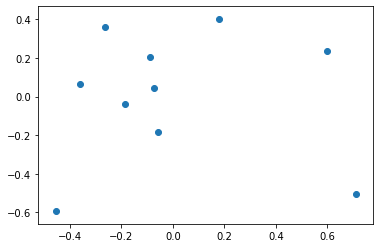

In [161]:
plt.scatter(new_2d_x[:, 0], new_2d_x[:, 1])

In [162]:
u, d, v = np.linalg.svd(sigma)

In [163]:
# u = eigenvector
u

array([[-0.66306614,  0.18355152, -0.38266318, -0.49935729,  0.36175034],
       [-0.56770595, -0.23416243, -0.13196234,  0.23047732, -0.74319853],
       [-0.17882528, -0.53906996, -0.22008597,  0.5910491 ,  0.52881776],
       [ 0.0419208 , -0.77012783,  0.28490372, -0.56895218, -0.01640318],
       [-0.45201483,  0.16668384,  0.84056342,  0.15645088,  0.19202956]])

In [164]:
# d = eigenvalues
d

array([0.15020263, 0.11558965, 0.05851771, 0.03905127, 0.01204867])

In [165]:
svd_x = np.matmul(X, u[:, :2])
svd_x

array([[ 0.26467033,  0.36160446],
       [ 0.45435625, -0.59384284],
       [ 0.05653485, -0.18185195],
       [-0.7101593 , -0.50507786],
       [ 0.0747748 ,  0.04449981],
       [-0.59736084,  0.23623639],
       [ 0.18449137, -0.03790061],
       [ 0.36223129,  0.06638161],
       [ 0.08962347,  0.20731525],
       [-0.1791622 ,  0.40263575]])

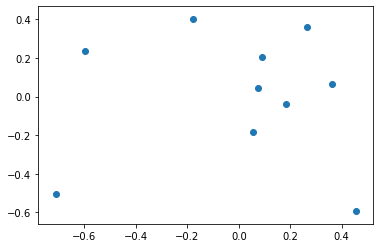

In [166]:
plt.scatter(svd_x[:, 0], svd_x[:, 1])

In [167]:
# Cumulative variance
cum_var = (np.cumsum(eig_values[dsc_index]) / eig_values[dsc_index].sum())*100
cum_var

array([ 40.01029756,  70.80054655,  86.3882293 ,  96.79052963,
       100.        ])

In [168]:
variance = eig_values[dsc_index]/eig_values[dsc_index].sum()*100
variance

array([40.01029756, 30.79024899, 15.58768274, 10.40230034,  3.20947037])

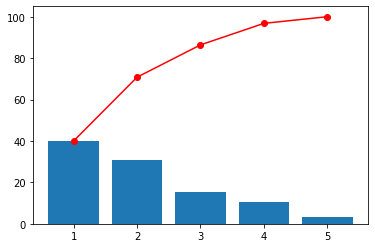

In [169]:
plt.plot(np.arange(1, X.shape[1] + 1), cum_var, c= 'red', marker = 'o')
plt.bar(np.arange(1, X.shape[1] + 1), variance)
plt.xticks(np.arange(1, X.shape[1] + 1))
plt.show()

# PCA Lab part
<hr>

In [170]:
from sklearn import datasets
X, color = datasets.make_swiss_roll(n_samples=1000, noise=0.05, random_state=None)
X.shape

(1000, 3)

In [171]:
X

array([[-9.21582195, 18.60235832, -3.26075003],
       [-9.32529678, 19.40884645,  0.83575898],
       [-2.12188566,  3.48391037,  7.8322499 ],
       ...,
       [-9.35411285,  3.12566847, -2.35602308],
       [12.59996061,  1.15054253, -0.4477829 ],
       [ 1.91707994, 13.56759825, 13.8582377 ]])

In [172]:
color.shape

(1000,)

In [173]:
np.mean(X, axis=0)

array([ 1.88468499, 10.54188615,  0.20823813])

In [174]:
def normalise_data(X):
    mu = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    norm = (X-mu)/std
    return norm

In [175]:
X_norm = normalise_data(X)

In [176]:
def CovarMatrix(norm):
    m = X.shape[0]
    cov = (1/(m-1)) * (np.matmul(X.T, X))
    return sigma

In [177]:
sigma = CovarMatrix(X_norm)
sigma

array([[ 0.08981522,  0.04679335,  0.00208014, -0.01587096,  0.02751829],
       [ 0.04679335,  0.06449527,  0.03212337,  0.01009624,  0.02722978],
       [ 0.00208014,  0.03212337,  0.05823919,  0.0299555 , -0.00423604],
       [-0.01587096,  0.01009624,  0.0299555 ,  0.08621411, -0.00718438],
       [ 0.02751829,  0.02722978, -0.00423604, -0.00718438,  0.07664615]])

In [178]:
eig_values[dsc_index]

array([0.15020263, 0.11558965, 0.05851771, 0.03905127, 0.01204867])

In [179]:
eig_vectors[:, dsc_index]

array([[ 0.66306614,  0.18355152,  0.38266318,  0.49935729,  0.36175034],
       [ 0.56770595, -0.23416243,  0.13196234, -0.23047732, -0.74319853],
       [ 0.17882528, -0.53906996,  0.22008597, -0.5910491 ,  0.52881776],
       [-0.0419208 , -0.77012783, -0.28490372,  0.56895218, -0.01640318],
       [ 0.45201483,  0.16668384, -0.84056342, -0.15645088,  0.19202956]])

In [180]:
def find_eig(sigma):
    eig_value, eig_vector = np.linalg.eig(sigma)
    ac_index = np.argsort(eig_value)
    dc_index = ac_index[::-1]
    eig_vector = eig_vector[:, dc_index]
    eig_value = eig_value[dc_index]
    return eig_vector, eig_value

In [181]:
eig_vec, eig_val = find_eig(sigma)

In [182]:
X_norm

array([[-1.72319675,  1.3191011 , -0.48961668],
       [-1.74019117,  1.45108336,  0.08856896],
       [-0.62196344, -1.15504196,  1.07606114],
       ...,
       [-1.74466446, -1.21366846, -0.36192256],
       [ 1.66339503, -1.53689901, -0.09259151],
       [ 0.00502886,  0.4951596 ,  1.92657548]])

In [183]:
eig_vec[:, :2].shape

(5, 2)

In [184]:
X_norm.shape

(1000, 3)

In [185]:
eig_vec[:3, :2].shape

(3, 2)

In [186]:
eig_vec

array([[ 0.66306614,  0.18355152,  0.38266318,  0.49935729,  0.36175034],
       [ 0.56770595, -0.23416243,  0.13196234, -0.23047732, -0.74319853],
       [ 0.17882528, -0.53906996,  0.22008597, -0.5910491 ,  0.52881776],
       [-0.0419208 , -0.77012783, -0.28490372,  0.56895218, -0.01640318],
       [ 0.45201483,  0.16668384, -0.84056342, -0.15645088,  0.19202956]])

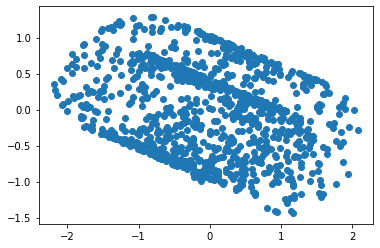

In [187]:
X_2d = np.matmul(X_norm, eig_vec[:3, :2])
plt.scatter(X_2d[:, 0], X_2d[:, 1])

In [188]:
# Cumulative variance
cum_var = (np.cumsum(eig_val) / eig_val.sum())*100
cum_var

array([ 40.01029756,  70.80054655,  86.3882293 ,  96.79052963,
       100.        ])

In [189]:
variance = eig_val/eig_val.sum()*100
variance

array([40.01029756, 30.79024899, 15.58768274, 10.40230034,  3.20947037])

In [190]:
X_norm.shape[1]

3

In [191]:
X_norm.shape[1] 

3

In [192]:
np.arange(1, X_norm.shape[1] + 1)

array([1, 2, 3])

In [193]:
def eig_svd(sigma):
    # u = eigenvector, d = eigenvalue
    u, d, v = np.linalg.svd(sigma)
    ac_index = np.argsort(d)
    dc_index = ac_index[::-1]
    eigen_vector = u[:, dc_index]
    eigen_value = d[dc_index]
    return eigen_vector, eigen_value

In [194]:
eigen_vector, eigen_value = eig_svd(sigma)

In [195]:
# Cumulative variance
cum_var = (np.cumsum(eigen_value) / eigen_value.sum())*100
variance = eigen_value/eigen_value.sum()*100

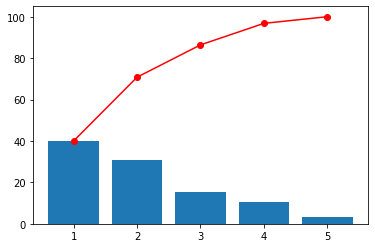

In [196]:
plt.plot(np.arange(1, X_norm.shape[1] + 3), cum_var, c= 'red', marker = 'o')
plt.bar(np.arange(1, X_norm.shape[1] + 3), variance)
plt.xticks(np.arange(1, X_norm.shape[1] + 3))
plt.show()

Text(0.5, 1.0, 'Plot by eig method')

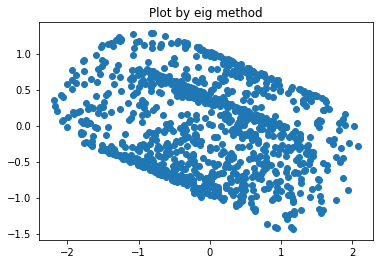

In [201]:
# eig method
X_2d = np.matmul(X_norm, eig_vec[:3, :2])
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.title('Plot by eig method')

Text(0.5, 1.0, 'Plot by svd method')

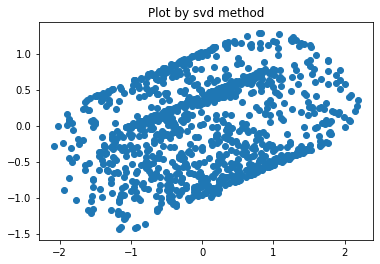

In [202]:
# svd method
X_2d = np.matmul(X_norm, eigen_vector[:3, :2])
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.title('Plot by svd method')

In [203]:
eigen_vector, eigen_value

(array([[-0.66306614,  0.18355152, -0.38266318, -0.49935729,  0.36175034],
        [-0.56770595, -0.23416243, -0.13196234,  0.23047732, -0.74319853],
        [-0.17882528, -0.53906996, -0.22008597,  0.5910491 ,  0.52881776],
        [ 0.0419208 , -0.77012783,  0.28490372, -0.56895218, -0.01640318],
        [-0.45201483,  0.16668384,  0.84056342,  0.15645088,  0.19202956]]),
 array([0.15020263, 0.11558965, 0.05851771, 0.03905127, 0.01204867]))

In [204]:
eig_vec, eig_val

(array([[ 0.66306614,  0.18355152,  0.38266318,  0.49935729,  0.36175034],
        [ 0.56770595, -0.23416243,  0.13196234, -0.23047732, -0.74319853],
        [ 0.17882528, -0.53906996,  0.22008597, -0.5910491 ,  0.52881776],
        [-0.0419208 , -0.77012783, -0.28490372,  0.56895218, -0.01640318],
        [ 0.45201483,  0.16668384, -0.84056342, -0.15645088,  0.19202956]]),
 array([0.15020263, 0.11558965, 0.05851771, 0.03905127, 0.01204867]))

In [206]:
np.mean(eigen_value) - eig_val

-1.942890293094024e-16

## Import Iris dataset
<hr>

In [220]:
from sklearn.datasets import load_iris


In [222]:
iris = load_iris()
iris.target_names, iris.feature_names

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [223]:
X = iris.data
y = iris.target

In [227]:
from sklearn.model_selection import train_test_split

In [228]:
X_norm = normalise_data(X)

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, shuffle=False)

In [246]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X_train)
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

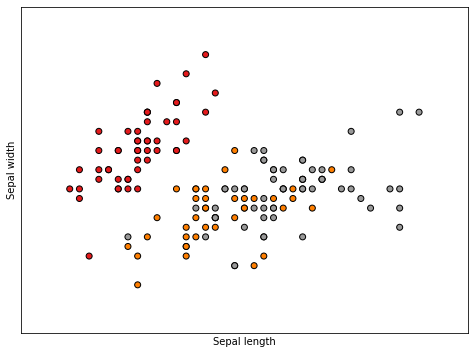

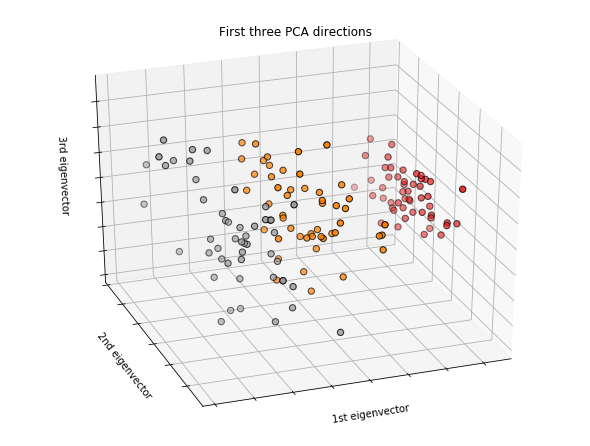

In [241]:
from mpl_toolkits.mplot3d import Axes3D
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()